In [1]:
import os
import warnings
import math

warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

from pylab import rcParams
rcParams['figure.figsize'] = 10, 6

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model
from sklearn.metrics import precision_score, recall_score, roc_curve,auc, f1_score, roc_auc_score, confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, normalize
from scipy import ndimage
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.svm import SVC


In [2]:

train_data = pd.read_csv('exoTrain.csv').fillna(0)
test_data = pd.read_csv('exoTest.csv').fillna(0)

train_data.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [3]:

new_labels = {1:0, 2:1}
train_data.LABEL = [new_labels[item] for item in train_data.LABEL]
test_data.LABEL = [new_labels[item] for item in test_data.LABEL]


Text(0.5, 1.0, 'Class Distributions \n (0 : Not Exoplanet || 1: Exoplanet)')

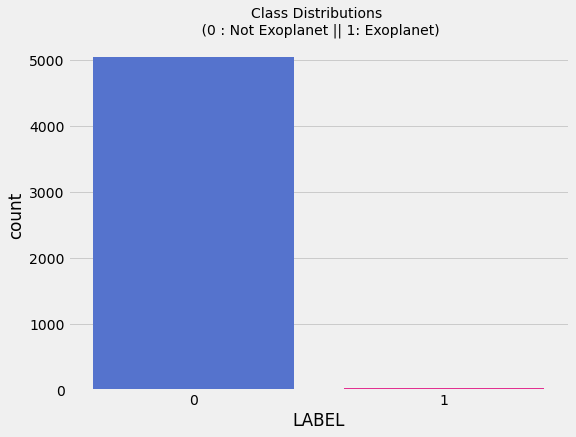

In [4]:

plt.figure(figsize=(8,6))
colors = ['royalblue','deeppink']
sns.countplot('LABEL', data =train_data, palette=colors)
plt.title('Class Distributions \n (0 : Not Exoplanet || 1: Exoplanet)', fontsize=14)


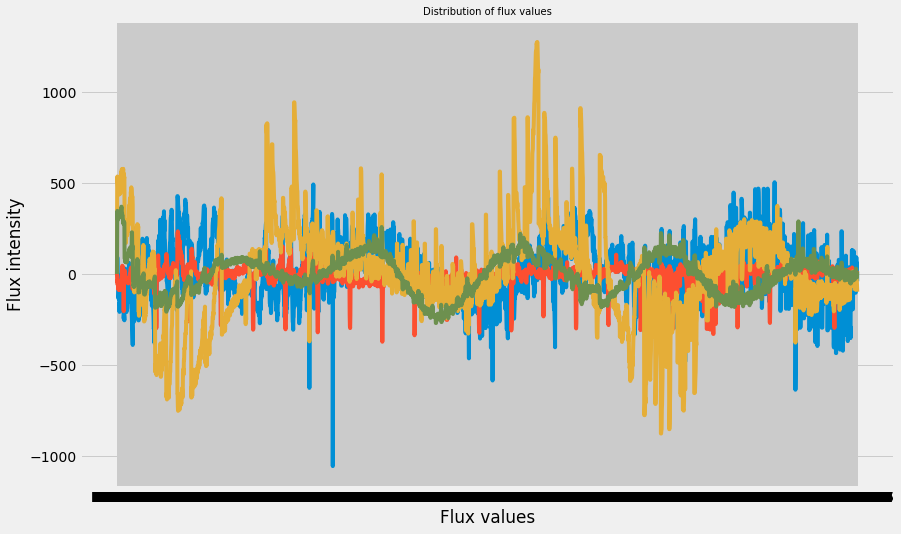

In [5]:

rcParams['figure.figsize'] = 13,8
plt.title('Distribution of flux values', fontsize=10)
plt.xlabel('Flux values')
plt.ylabel('Flux intensity')

plt.plot(train_data.iloc[0])
plt.plot(train_data.iloc[1])
plt.plot(train_data.iloc[2])
plt.plot(train_data.iloc[3])
plt.show()


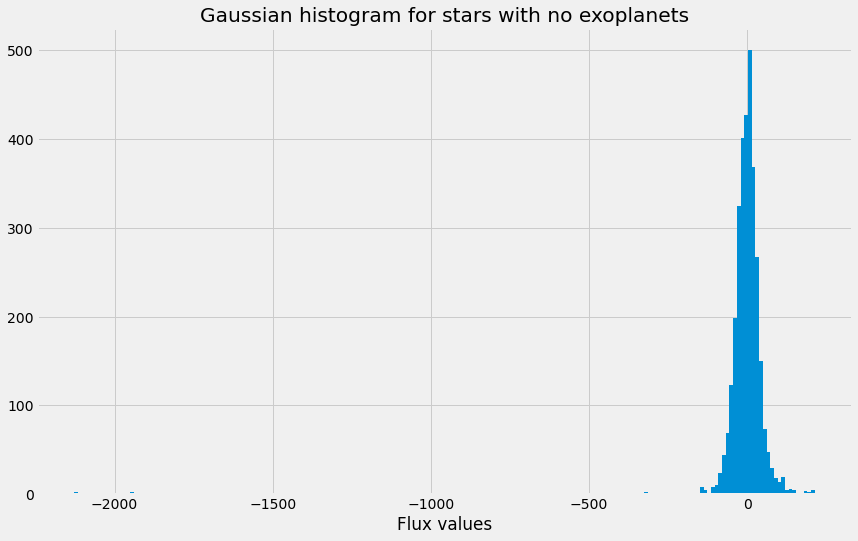

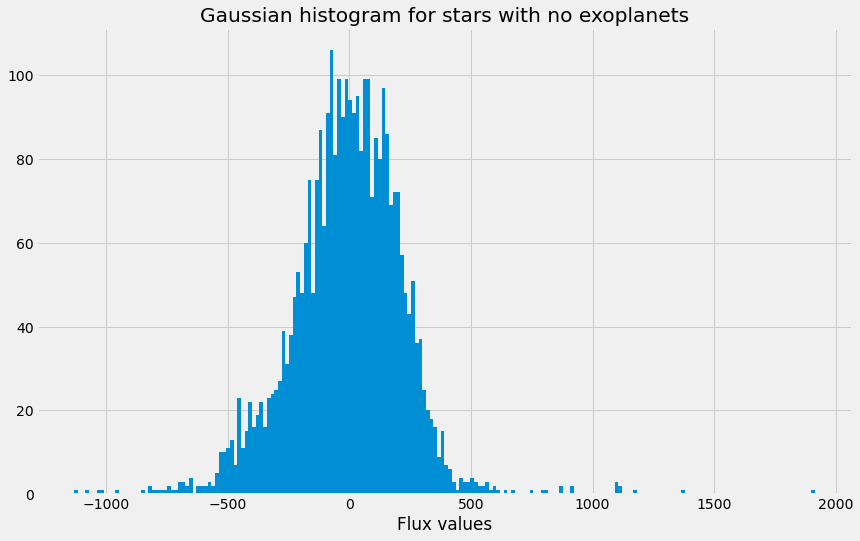

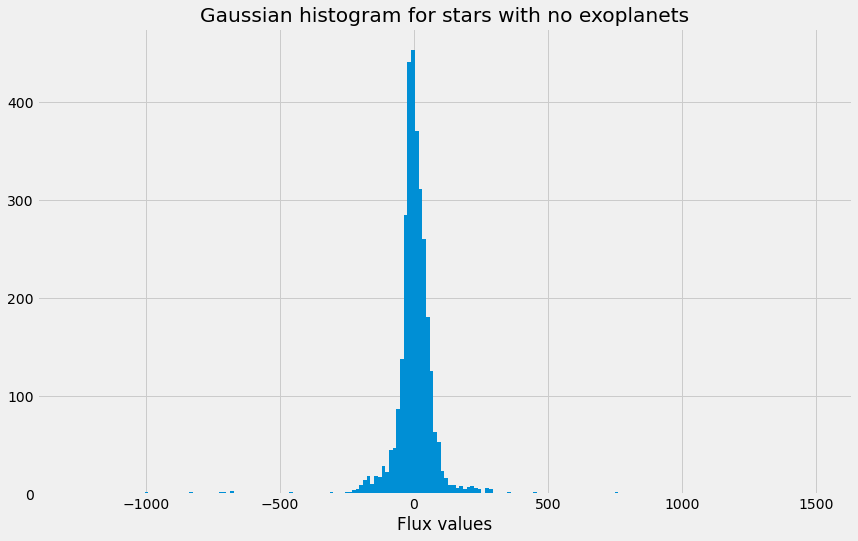

In [22]:

labels_nexo = [100,200,300]

for i in labels_nexo:
    plt.hist(train_data.iloc[i,:], bins= 200)
    plt.title("Gaussian histogram for stars with no exoplanets")
    plt.xlabel("Flux values")
    plt.show()
    
    

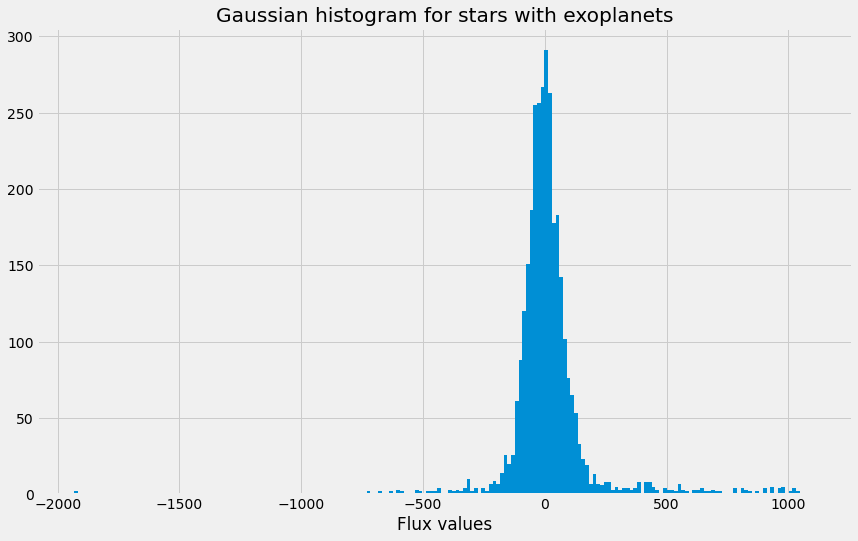

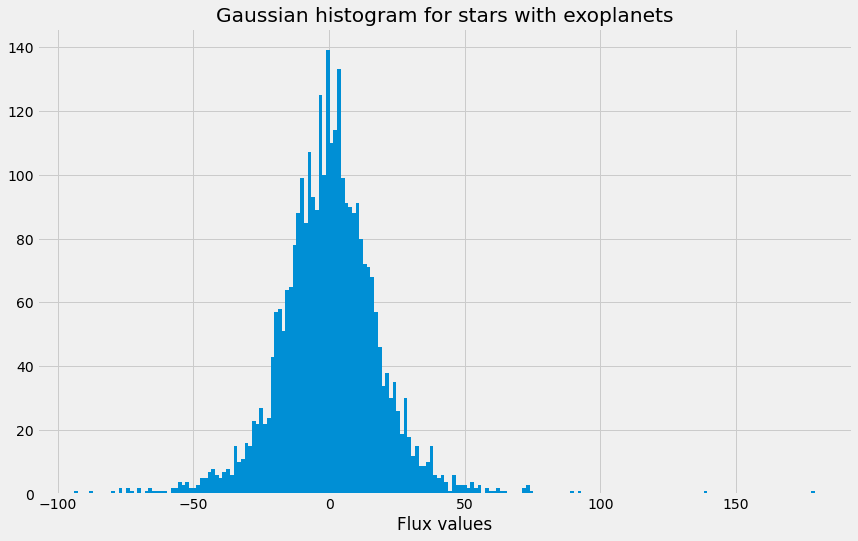

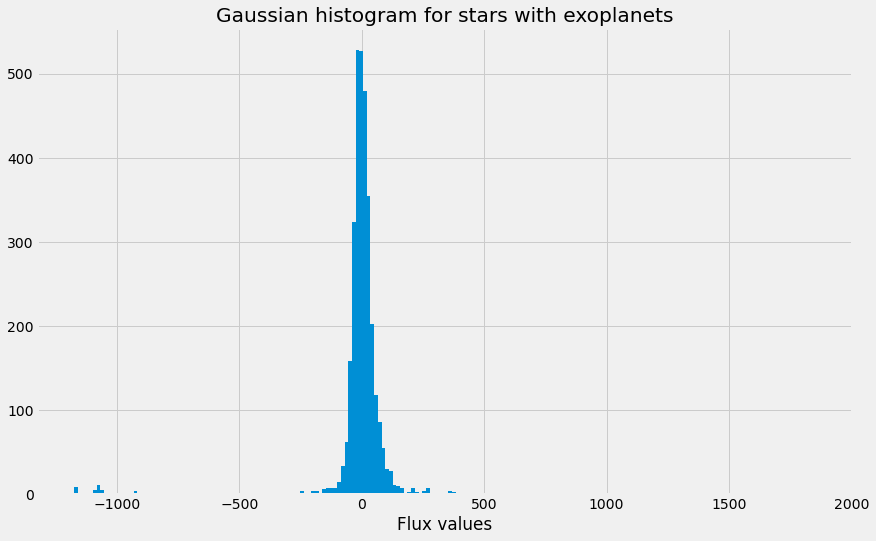

In [23]:

labels_exo = [10,17,35]
for i in labels_exo :
    plt.hist(train_data.iloc[i,:], bins=200)
    plt.title("Gaussian histogram for stars with exoplanets")
    plt.xlabel("Flux values")
    plt.show()

In [8]:

x_train = train_data.drop(["LABEL"], axis=1)
y_train = train_data["LABEL"]

x_test = test_data.drop(["LABEL"], axis=1)
y_test = test_data["LABEL"]

In [9]:

x_train = normalized = normalize(x_train)
x_test = normalize(x_test)

x_train = filtered = ndimage.filters.gaussian_filter(x_train, sigma=10)
x_test = ndimage.filters.gaussian_filter(x_test, sigma=10)


In [10]:

std_scaler = StandardScaler()
x_train = scaled = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)


In [11]:
pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

total = sum(pca.explained_variance_)
k=0
current_variance=0

while (current_variance/total) < 0.90:
    current_variance += pca.explained_variance_[k]
    k=k+1
    

In [12]:
print(k)

15


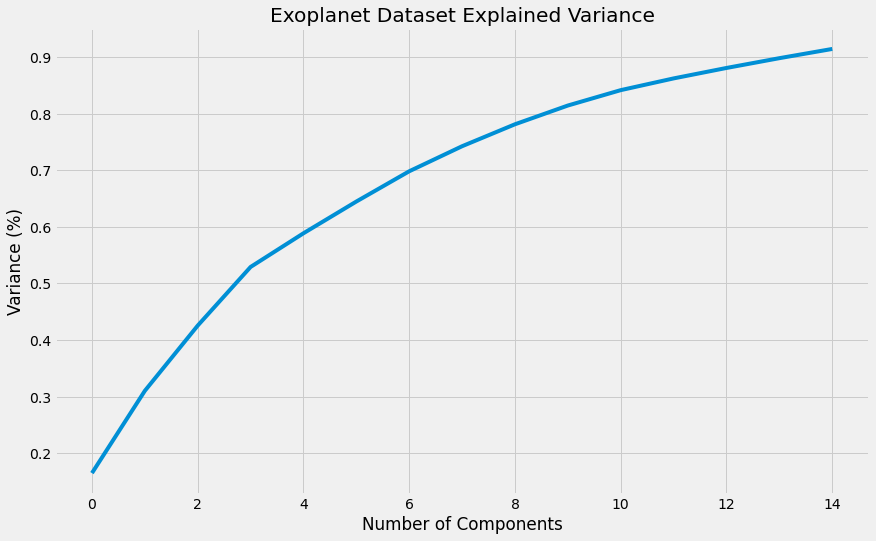

In [13]:

pca = PCA(n_components = k)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Exoplanet Dataset Explained Variance')
plt.show()


In [14]:

x_train.shape


(5087, 15)

In [15]:
x_test.shape

(570, 15)

In [16]:
print("Before Oversampling, counts of label '1' :{}" .format(sum(y_train==1)))
print("Before Oversampling, counts of label '0' :{}" . format(sum(y_train==0)))


sm = SMOTE(random_state=15, sampling_strategy=1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())
print("\nAfter oversampling, counts of label '1' : {}" .format(sum(y_train_res==1)))
print("After Oversampling, counts of label '0': {}" .format(sum(y_train_res==0)))


Before Oversampling, counts of label '1' :37
Before Oversampling, counts of label '0' :5050

After oversampling, counts of label '1' : 5050
After Oversampling, counts of label '0': 5050


In [20]:
def model(classifier, dtrain_x, dtrain_y, dtest_x, dtest_y):
    classifier.fit(dtrain_x,dtrain_y)
    predictions = classifier.predict(dtest_x)
    
    accuracies = cross_val_score(estimator = classifier, X = x_train_res, y = y_train_res, cv = 5, n_jobs = -1)
    mean = accuracies.mean()
    variance = accuracies.std()
    print("Accuracy mean:"+ str(mean))
    print("Accuracy variance:"+ str(variance))
    
    print("\n accuracy_score : ", accuracy_score(dtest_y, predictions))
    print("\n classification report : \n", (classification_report(dtest_y,predictions)))
    
    plt.figure(figsize=(13,10))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(dtest_y,predictions), annot=True, cmap="viridis", fmt="d", linecolor="k", linewidths=3)
    plt.title("CONFUSION MATRIX", fontsize=20)
  
      
#     df1 = pd.DataFrame.from_records(dtrain_x)
#     tmp = pd.DataFrame({'Feature': df1.columns, 'Feature importance': classifier.feature_importances_})
#     tmp = tmp.sort_values(by = 'Feature importance', ascending=False)
#     plt.figure(figsize = (7,4))
#     plt.title('Features importance', fontsize=14)
#     s = sns.barplot(x ='Feature', y='Feature importance', data=tmp)
#     s.set_xticklabels(s.get_xticklabels(), rotation=90)
#     plt.show()

Accuracy mean:0.9992079207920792
Accuracy variance:0.0015841584158415856

 accuracy_score :  0.9912280701754386

 classification report : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       565
           1       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



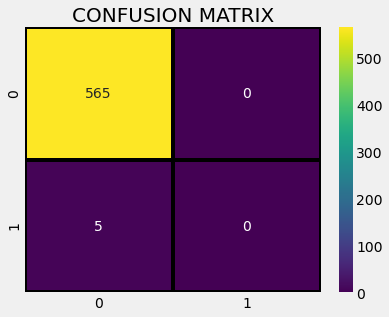

In [21]:

SVM_model = SVC()
model(SVM_model, x_train_res, y_train_res, x_test, y_test)

Accuracy mean:1.0
Accuracy variance:0.0

 accuracy_score :  0.9912280701754386

 classification report : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       565
           1       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



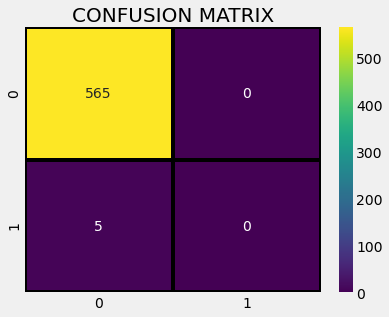

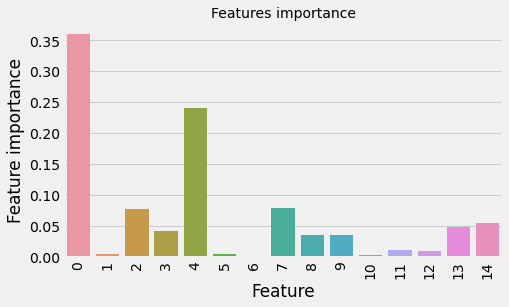

In [19]:

from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
model(rf_classifier, x_train_res, y_train_res, x_test, y_test)
